In [14]:
import nfl_data_py as nfl
import pandas as pd
import os
import urllib.request
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox
from matplotlib.offsetbox import OffsetImage

from PIL import Image
import numpy as np
from io import BytesIO
import requests
# ML Libraryies
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#import hvplot.pandas
import plotly.express as px

# Graphing 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure

In [15]:
# import data
weekly_nfl = nfl.import_weekly_data([2024])
#weekly_nfl = weekly_nfl[weekly_nfl['week'].between(1, 18)]

weekly_nfl.dtypes

Downcasting floats.


player_id                       object
player_name                     object
player_display_name             object
position                        object
position_group                  object
headshot_url                    object
recent_team                     object
season                           int32
week                             int32
season_type                     object
opponent_team                   object
completions                      int32
attempts                         int32
passing_yards                  float32
passing_tds                      int32
interceptions                  float32
sacks                          float32
sack_yards                     float32
sack_fumbles                     int32
sack_fumbles_lost                int32
passing_air_yards              float32
passing_yards_after_catch      float32
passing_first_downs            float32
passing_epa                    float32
passing_2pt_conversions          int32
pacr                     

In [16]:
### RB stats
# gather RB stats
rb_df_two = weekly_nfl[(weekly_nfl["position"] == "RB")]
new_columns = ['week','player_display_name','recent_team', 'opponent_team','fantasy_points', 'fantasy_points_ppr','receptions','receiving_yards','targets','rushing_tds','rushing_fumbles','rushing_epa','rushing_yards','carries']
rb_df = rb_df_two[new_columns]
rb_df.head()

# Create Excel for RB's
rb_df = rb_df.reset_index(drop=True)
rb_df.to_excel("rb_2024_new_23.xlsx", index=False)

In [17]:
## Groupby opponent team and get mean

# Groupby opponent and week offense stats
team_by_week = rb_df.groupby(['week', 'opponent_team'])
team_by_week.head()
team_stats_per_game = team_by_week.sum()
team_stats_per_game.index.set_names(['week', 'team_defense'], inplace=True)
team_stats_per_game = team_stats_per_game.reset_index()
team_stats_per_game.head()

,week,team_defense,fantasy_points,fantasy_points_ppr,receptions,receiving_yards,targets,rushing_tds,rushing_fumbles,rushing_epa,rushing_yards,carries
0,1,ARI,13.700000,17.700001,4,46.0,5,0,0.0,-5.059976,91.0,24
1,1,ATL,11.200000,14.200000,3,22.0,4,0,0.0,-2.948786,90.0,26
2,1,BAL,15.100000,18.100000,3,43.0,5,1,0.0,-4.079628,48.0,17
3,1,BUF,26.699999,32.700001,6,64.0,7,1,0.0,-3.848113,63.0,19
4,1,CAR,29.200001,35.200001,6,40.0,6,2,0.0,2.048917,132.0,30


In [18]:
# get mean of defense

team_rb_mean = team_stats_per_game.groupby('team_defense').mean()
team_rb_mean.columns = [col + '_def' for col in team_rb_mean.columns]
team_rb_mean = team_rb_mean.drop('week_def', axis=1)
team_rb_mean = team_rb_mean.reset_index()
team_rb_mean.head()


,team_defense,fantasy_points_def,fantasy_points_ppr_def,receptions_def,receiving_yards_def,targets_def,rushing_tds_def,rushing_fumbles_def,rushing_epa_def,rushing_yards_def,carries_def
0,ARI,18.535294,22.888235,4.352941,32.823528,5.176471,0.705882,0.117647,0.220882,105.470589,22.470588
1,ATL,15.788235,21.258823,5.470588,34.352940,6.411765,0.352941,0.235294,-1.528810,84.705879,19.235294
2,BAL,14.378947,19.063158,4.684211,37.684212,6.210526,0.473684,0.105263,-2.663150,65.052635,18.210526
3,BUF,19.094736,24.199999,5.105263,40.578949,6.578947,0.578947,0.210526,-1.720218,94.578949,20.894737
4,CAR,25.752941,30.047058,4.294118,34.000000,5.058824,1.058824,0.058824,3.456641,148.235291,28.588235


In [19]:
# get mean of team rb stats
# Groupby opponent and week offense stats
team_rb = rb_df.groupby(['week', 'recent_team'])
team_rb.head()
team_stats_rb= team_rb.sum()
team_stats_rb.index.set_names(['week', 'team_rb'], inplace=True)

team_stats_rb = team_stats_rb.reset_index()
team_stats_rb.head()

,week,team_rb,fantasy_points,fantasy_points_ppr,receptions,receiving_yards,targets,rushing_tds,rushing_fumbles,rushing_epa,rushing_yards,carries
0,1,ARI,26.699999,32.700001,6,64.0,7,1,0.0,-3.848113,63.0,19
1,1,ATL,13.200001,18.200001,5,43.0,5,0,0.0,-0.244456,89.0,21
2,1,BAL,16.100000,22.100000,6,52.0,10,1,0.0,2.635932,49.0,14
3,1,BUF,13.700000,17.700001,4,46.0,5,0,0.0,-5.059976,91.0,24
4,1,CAR,4.300000,4.300000,0,0.0,2,0,0.0,-6.685881,43.0,15


In [7]:
# get mean of rb

team_rb_df = team_stats_rb.groupby('team_rb').mean()
team_rb_df = team_rb_df.drop('week', axis=1)
team_rb_df = team_rb_df.reset_index()
team_rb_df.head()


,team_rb,fantasy_points,fantasy_points_ppr,receptions,receiving_yards,targets,rushing_tds,rushing_fumbles,rushing_epa,rushing_yards,carries
0,ARI,20.047058,24.929411,4.882353,37.941177,5.588235,0.705882,0.176471,0.654680,108.411766,21.823529
1,ATL,22.182352,26.535294,4.352941,30.529411,5.000000,1.000000,0.058824,0.835937,125.411766,26.705882
2,BAL,24.768421,28.347368,3.578947,32.842106,4.421053,1.052632,0.157895,2.207087,133.789474,23.736842
3,BUF,24.200001,28.042105,3.842105,41.052631,4.631579,1.157895,0.052632,0.546166,103.052635,22.105263
4,CAR,15.841177,20.017647,4.176471,20.000000,5.294118,0.705882,0.058824,-0.238347,91.352943,20.176471


In [8]:
# get team logo
# Get NFL Logos for DF
logos = nfl.import_team_desc()[['team_abbr', 'team_logo_espn']]
logo_paths = []
team_abbr = []
if not os.path.exists("logos"):
    os.makedirs("logos")

for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
    logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
    team_abbr.append(logos['team_abbr'][team])

data = {'team_abbr' : team_abbr, 'logo_path' : logo_paths}
logo_data = pd.DataFrame(data)

team_rb_df = pd.merge(team_rb_df, logo_data, left_on = 'team_rb', right_on = 'team_abbr')
team_rb_mean = pd.merge(team_rb_mean, logo_data, left_on = 'team_defense', right_on = 'team_abbr')

In [9]:
team_rb_mean.head()

,team_defense,fantasy_points_def,fantasy_points_ppr_def,receptions_def,receiving_yards_def,targets_def,rushing_tds_def,rushing_fumbles_def,rushing_epa_def,rushing_yards_def,carries_def,team_abbr,logo_path
0,ARI,18.535294,22.888235,4.352941,32.823528,5.176471,0.705882,0.117647,0.220882,105.470589,22.470588,ARI,logos/ARI.tif
1,ATL,15.788235,21.258823,5.470588,34.352940,6.411765,0.352941,0.235294,-1.528810,84.705879,19.235294,ATL,logos/ATL.tif
2,BAL,14.378947,19.063158,4.684211,37.684212,6.210526,0.473684,0.105263,-2.663150,65.052635,18.210526,BAL,logos/BAL.tif
3,BUF,19.094736,24.199999,5.105263,40.578949,6.578947,0.578947,0.210526,-1.720218,94.578949,20.894737,BUF,logos/BUF.tif
4,CAR,25.752941,30.047058,4.294118,34.000000,5.058824,1.058824,0.058824,3.456641,148.235291,28.588235,CAR,logos/CAR.tif


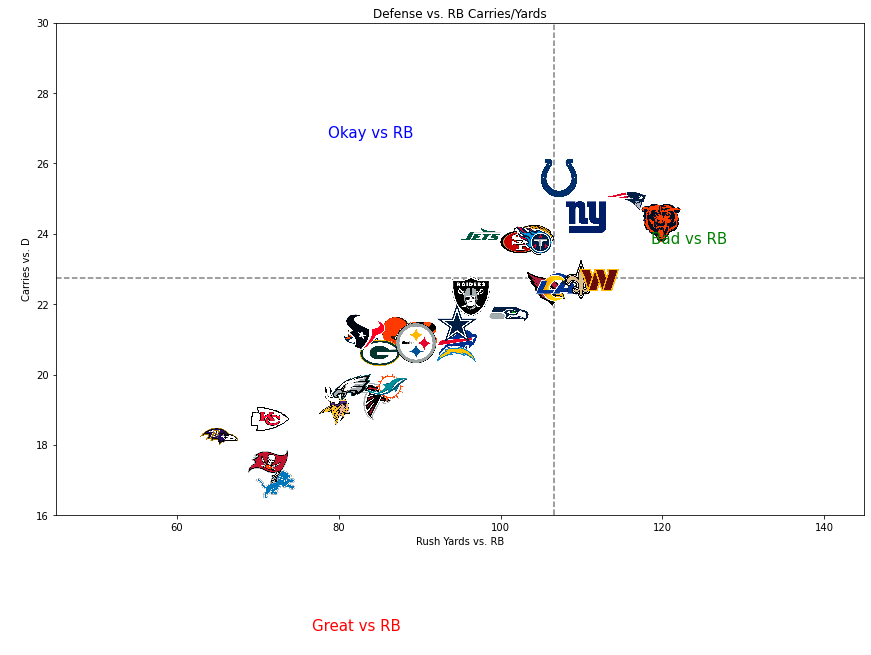

In [10]:
# create graph for D vs RB

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image, ImageOps  # Make sure to import ImageOps here
import numpy as np

plt.rcParams["figure.figsize"] = [12, 9]
plt.rcParams["figure.autolayout"] = True

# Function to load, resize, and pad images to a consistent size
def getImage(path):
    img = Image.open(path)
    
    # Resize image while maintaining aspect ratio
    img = ImageOps.fit(img, (550, 550), method=0, bleed=0.0, centering=(0.5, 0.5))
    
    return OffsetImage(np.array(img), zoom=0.08)

y = team_rb_mean['carries_def']
x = team_rb_mean['rushing_yards_def']
paths = team_rb_mean['logo_path']

fig, ax = plt.subplots()

# Define quadrant boundaries
x_mid = (x.max() + x.min()) / 2
y_mid = (y.max() + y.min()) / 2

# Quadrant 1 (Top-Right)
for x0, y0, path in zip(x, y, paths):
    if x0 >= x_mid and y0 >= y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

# Quadrant 2 (Top-Left)
for x0, y0, path in zip(x, y, paths):
    if x0 < x_mid and y0 >= y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

# Quadrant 3 (Bottom-Left)
for x0, y0, path in zip(x, y, paths):
    if x0 < x_mid and y0 < y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

# Quadrant 4 (Bottom-Right)
for x0, y0, path in zip(x, y, paths):
    if x0 >= x_mid and y0 < y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

        
plt.axvline(x_mid, color='black', linestyle='--', alpha=0.5)
plt.axhline(y_mid, color='black', linestyle='--', alpha=0.5)

plt.title("Defense vs. RB Carries/Yards")
plt.ylabel("Carries vs. D")
plt.xlabel("Rush Yards vs. RB")
plt.grid(False)
plt.xlim(45, 145)
plt.ylim(16, 30)
# Quadrant 1 
plt.text(x_mid + 12, y_mid + 1, 'Bad vs RB', fontsize=15, color='green')

# Quadrant 2 
plt.text(x_mid - 28, y_mid + 4, 'Okay vs RB', fontsize=15, color='blue')

# Quadrant 3 
plt.text(x_mid - 30, y_mid - 10, 'Great vs RB', fontsize=15, color='red')

# Quadrant 4 
#plt.text(x_mid + 30, y_mid - 10, 'Good vs RB', fontsize=15, color='orange')

plt.savefig('D_vs.png')
plt.show()

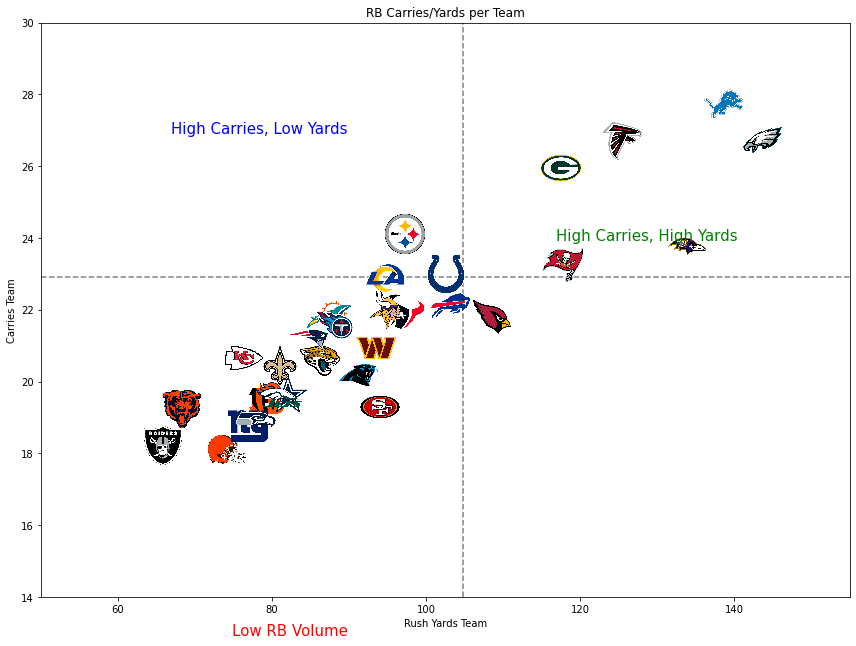

In [11]:
# create graph for RB team

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image, ImageOps  # Make sure to import ImageOps here
import numpy as np

plt.rcParams["figure.figsize"] = [12, 9]
plt.rcParams["figure.autolayout"] = True

# Function to load, resize, and pad images to a consistent size
def getImage(path):
    img = Image.open(path)
    
    # Resize image while maintaining aspect ratio
    img = ImageOps.fit(img, (550, 550), method=0, bleed=0.0, centering=(0.5, 0.5))
    
    return OffsetImage(np.array(img), zoom=0.08)

y = team_rb_df['carries']
x = team_rb_df['rushing_yards']
paths = team_rb_df['logo_path']

fig, ax = plt.subplots()

# Define quadrant boundaries
x_mid = (x.max() + x.min()) / 2
y_mid = (y.max() + y.min()) / 2

# Quadrant 1 (Top-Right)
for x0, y0, path in zip(x, y, paths):
    if x0 >= x_mid and y0 >= y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

# Quadrant 2 (Top-Left)
for x0, y0, path in zip(x, y, paths):
    if x0 < x_mid and y0 >= y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

# Quadrant 3 (Bottom-Left)
for x0, y0, path in zip(x, y, paths):
    if x0 < x_mid and y0 < y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

# Quadrant 4 (Bottom-Right)
for x0, y0, path in zip(x, y, paths):
    if x0 >= x_mid and y0 < y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

        
plt.axvline(x_mid, color='black', linestyle='--', alpha=0.5)
plt.axhline(y_mid, color='black', linestyle='--', alpha=0.5)

plt.title("RB Carries/Yards per Team")
plt.ylabel("Carries Team")
plt.xlabel("Rush Yards Team")
plt.grid(False)
plt.xlim(50, 155)
plt.ylim(14, 30)
# Quadrant 1 
plt.text(x_mid + 12, y_mid + 1, 'High Carries, High Yards', fontsize=15, color='green')

# Quadrant 2 
plt.text(x_mid - 38, y_mid + 4, 'High Carries, Low Yards', fontsize=15, color='blue')

# Quadrant 3 
plt.text(x_mid - 30, y_mid - 10, 'Low RB Volume', fontsize=15, color='red')

# Quadrant 4 
#plt.text(x_mid + 30, y_mid - 10, 'Good vs RB', fontsize=15, color='orange')

#plt.savefig('RB_vs_D.png')
plt.show()

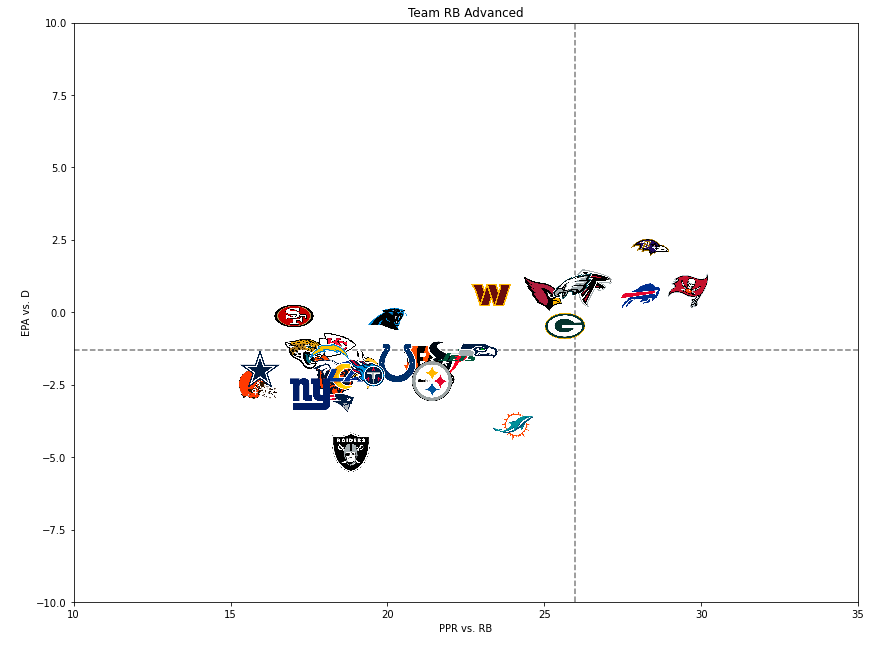

In [12]:
# create graph for D vs RB

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image, ImageOps  # Make sure to import ImageOps here
import numpy as np

plt.rcParams["figure.figsize"] = [12, 9]
plt.rcParams["figure.autolayout"] = True

# Function to load, resize, and pad images to a consistent size
def getImage(path):
    img = Image.open(path)
    
    # Resize image while maintaining aspect ratio
    img = ImageOps.fit(img, (550, 550), method=0, bleed=0.0, centering=(0.5, 0.5))
    
    return OffsetImage(np.array(img), zoom=0.08)

y = team_rb_df['rushing_epa']
x = team_rb_df['fantasy_points_ppr']
paths = team_rb_df['logo_path']

fig, ax = plt.subplots()

# Define quadrant boundaries
x_mid = (x.max() + x.min()) / 2
y_mid = (y.max() + y.min()) / 2

# Quadrant 1 (Top-Right)
for x0, y0, path in zip(x, y, paths):
    if x0 >= x_mid and y0 >= y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

# Quadrant 2 (Top-Left)
for x0, y0, path in zip(x, y, paths):
    if x0 < x_mid and y0 >= y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

# Quadrant 3 (Bottom-Left)
for x0, y0, path in zip(x, y, paths):
    if x0 < x_mid and y0 < y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

# Quadrant 4 (Bottom-Right)
for x0, y0, path in zip(x, y, paths):
    if x0 >= x_mid and y0 < y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

        
plt.axvline(x_mid, color='black', linestyle='--', alpha=0.5)
plt.axhline(y_mid, color='black', linestyle='--', alpha=0.5)

plt.title("Team RB Advanced")
plt.ylabel("EPA vs. D")
plt.xlabel("PPR vs. RB")
plt.grid(False)
plt.xlim(10, 35)
plt.ylim(-10, 10)

plt.show()

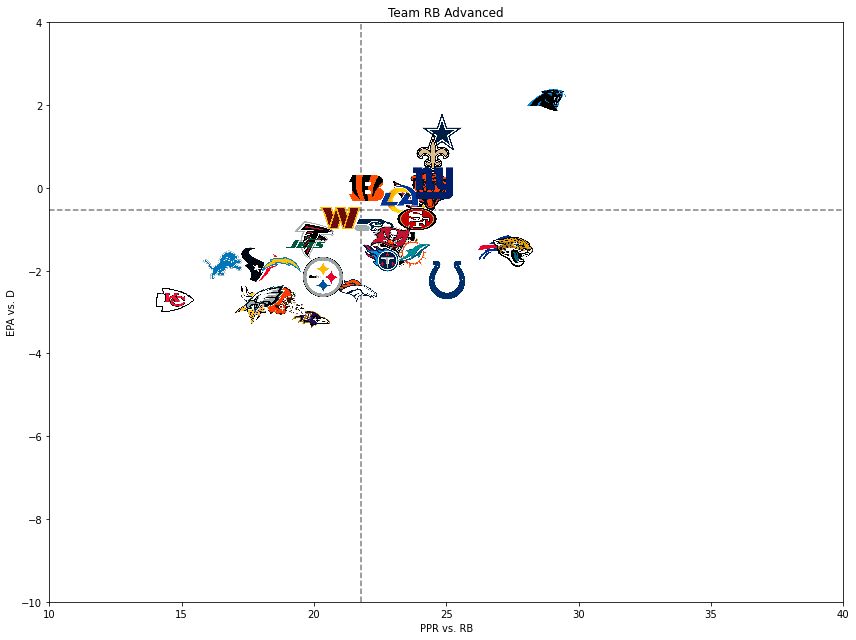

In [40]:
# create graph for D vs RB

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image, ImageOps  # Make sure to import ImageOps here
import numpy as np

plt.rcParams["figure.figsize"] = [12, 9]
plt.rcParams["figure.autolayout"] = True

# Function to load, resize, and pad images to a consistent size
def getImage(path):
    img = Image.open(path)
    
    # Resize image while maintaining aspect ratio
    img = ImageOps.fit(img, (550, 550), method=0, bleed=0.0, centering=(0.5, 0.5))
    
    return OffsetImage(np.array(img), zoom=0.08)

y = team_rb_mean['rushing_epa_def']
x = team_rb_mean['fantasy_points_ppr_def']
paths = team_rb_mean['logo_path']

fig, ax = plt.subplots()

# Define quadrant boundaries
x_mid = (x.max() + x.min()) / 2
y_mid = (y.max() + y.min()) / 2

# Quadrant 1 (Top-Right)
for x0, y0, path in zip(x, y, paths):
    if x0 >= x_mid and y0 >= y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

# Quadrant 2 (Top-Left)
for x0, y0, path in zip(x, y, paths):
    if x0 < x_mid and y0 >= y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

# Quadrant 3 (Bottom-Left)
for x0, y0, path in zip(x, y, paths):
    if x0 < x_mid and y0 < y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

# Quadrant 4 (Bottom-Right)
for x0, y0, path in zip(x, y, paths):
    if x0 >= x_mid and y0 < y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

        
plt.axvline(x_mid, color='black', linestyle='--', alpha=0.5)
plt.axhline(y_mid, color='black', linestyle='--', alpha=0.5)

plt.title("Team RB Advanced")
plt.ylabel("EPA vs. D")
plt.xlabel("PPR vs. RB")
plt.grid(False)
plt.xlim(10, 40)
plt.ylim(-10, 4)

plt.show()

In [24]:
# Add teams cover stats and compare to rushing yards

cover_df = pd.read_excel('cover_record.xlsx')


In [25]:
# get team logo
# Get NFL Logos for DF
logos = nfl.import_team_desc()[['team_abbr', 'team_logo_espn']]
logo_paths = []
team_abbr = []
if not os.path.exists("logos"):
    os.makedirs("logos")

for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
    logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
    team_abbr.append(logos['team_abbr'][team])

data = {'team_abbr' : team_abbr, 'logo_path' : logo_paths}
logo_data = pd.DataFrame(data)

cover_df = pd.merge(cover_df, logo_data, left_on = 'Team', right_on = 'team_abbr')


In [75]:
#remove = ['logo_path_x', 'team_abbr_y', 'logo_path_y', 'team_abbr_x']
#cover_df = cover_df.drop(columns=remove)
cover_df.head()

,Team,Wins,Losses,Ties,Cover %,MOV,ATS +/-,team_abbr,logo_path
0,WAS,7,2,1,0.778,7.3,7.4,WAS,logos/WAS.tif
1,PIT,7,2,0,0.778,7.7,6.4,PIT,logos/PIT.tif
2,DET,7,2,0,0.778,12.6,8.1,DET,logos/DET.tif
3,IND,7,3,0,0.700,-1.5,0.5,IND,logos/IND.tif
4,DEN,7,3,0,0.700,2.0,4.4,DEN,logos/DEN.tif


In [76]:
# Merge cover_df and team_rb_mean on team_abbr
cover_run_df = pd.merge(cover_df, team_rb_mean, on='team_abbr', suffixes=('_cover', '_rb'))
cover_run_df.to_excel("cover_rb_vs_yards.xlsx", index=False)
cover_run_df.tail()

,Team,Wins,Losses,Ties,Cover %,MOV,ATS +/-,team_abbr,logo_path_cover,team_defense,...,fantasy_points_ppr_def,receptions_def,receiving_yards_def,targets_def,rushing_tds_def,rushing_fumbles_def,rushing_epa_def,rushing_yards_def,carries_def,logo_path_rb
26,LA,3,6,0,0.333,-3.6,-2.6,LA,logos/LA.tif,LA,...,21.722221,4.000000,35.555557,4.444444,0.666667,0.111111,-0.859700,101.666664,24.777778,logos/LA.tif
27,NYJ,3,7,0,0.300,-3.7,-6.4,NYJ,logos/NYJ.tif,NYJ,...,20.460001,3.500000,29.900000,4.200000,0.600000,0.200000,-0.250028,105.699997,25.000000,logos/NYJ.tif
28,DAL,2,7,0,0.222,-9.1,-7.7,DAL,logos/DAL.tif,DAL,...,25.955555,3.666667,38.555557,4.333333,1.111111,0.111111,1.360834,111.000000,24.333333,logos/DAL.tif
29,TEN,1,8,0,0.111,-9.2,-5.6,TEN,logos/TEN.tif,TEN,...,22.768888,3.666667,24.000000,4.333333,0.777778,0.000000,-2.001463,80.222221,20.888889,logos/TEN.tif
30,SEA,2,6,1,0.250,-1.2,-1.8,SEA,logos/SEA.tif,SEA,...,22.344444,3.000000,28.222221,4.555556,0.777778,0.444444,-0.273616,123.000000,24.222222,logos/SEA.tif


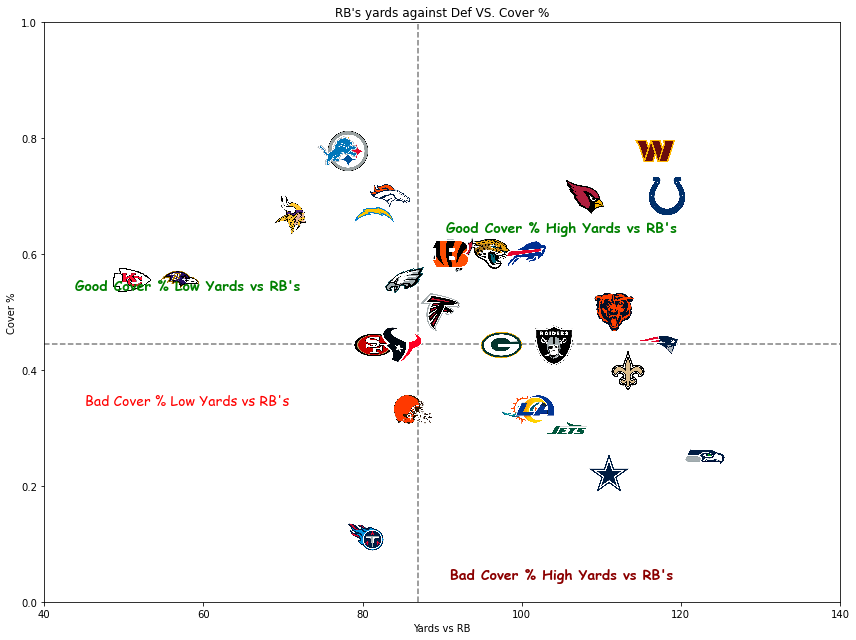

In [77]:
# create graph for Cover % vs RB

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image, ImageOps  # Make sure to import ImageOps here
import numpy as np
import random

plt.rcParams["figure.figsize"] = [12, 9]
plt.rcParams["figure.autolayout"] = True

# Function to load, resize, and pad images to a consistent size
def getImage(path):
    img = Image.open(path)
    
    # Resize image while maintaining aspect ratio
    img = ImageOps.fit(img, (550, 550), method=0, bleed=0.0, centering=(0.5, 0.5))
    
    return OffsetImage(np.array(img), zoom=0.08)

y = cover_run_df['Cover %']
x = cover_run_df['rushing_yards_def']
paths = cover_df['logo_path'].combine_first(team_rb_mean['logo_path'])

fig, ax = plt.subplots()

# Define quadrant boundaries
x_mid = (x.max() + x.min()) / 2
y_mid = (y.max() + y.min()) / 2

# Quadrant 1 (Top-Right)
for x0, y0, path in zip(x, y, paths):
    if x0 >= x_mid and y0 >= y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

# Quadrant 2 (Top-Left)
for x0, y0, path in zip(x, y, paths):
    if x0 < x_mid and y0 >= y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

# Quadrant 3 (Bottom-Left)
for x0, y0, path in zip(x, y, paths):
    if x0 < x_mid and y0 < y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

# Quadrant 4 (Bottom-Right)
for x0, y0, path in zip(x, y, paths):
    if x0 >= x_mid and y0 < y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

     
 # Adding quadrant text with specified colors
texts= [
    ("Good Cover % Low Yards vs RB's", (x_mid / 1.5, y_mid + 0.1), 'green', 'bold'),  # Top Left
    ("Good Cover % High Yards vs RB's", (x_mid + (x.max() - x_mid) / 2, y_mid + 0.2), 'green', 'bold'),  # Top Right
    ("Bad Cover % Low Yards vs RB's", (x_mid / 1.5, y_mid - 0.1), 'red', 'normal'),  # Bottom Left
    ("Bad Cover % High Yards vs RB's", (x_mid + (x.max() - x_mid) / 2, y_mid - 0.4), '#8B0000', 'bold')  # Bottom Right (dark red)
]

for text, (x_pos, y_pos), color, weight in texts:
    ax.text(x_pos, y_pos, text, fontsize=14, fontweight=weight, fontname='Comic Sans MS', color=color, ha='center', va='center')

plt.axvline(x_mid, color='black', linestyle='--', alpha=0.5)
plt.axhline(y_mid, color='black', linestyle='--', alpha=0.5)
plt.title("RB's yards against Def VS. Cover %")
plt.ylabel("Cover %")
plt.xlabel("Yards vs RB")
plt.grid(False)
plt.xlim(40, 140)
plt.ylim(0, 1)
plt.savefig('Cover%_RushYardsGivenUp.png')

plt.show()

In [78]:
# create stats correlating team rb stats and team cover %

# merge rb team and cover_df
# Merge cover_df and team_rb_mean on team_abbr
run_df = pd.merge(cover_df, team_rb_df, on='team_abbr', suffixes=('_cover', '_rb'))
run_df.to_excel("rb_yards_v_cover.xlsx", index=False)
run_df.head()


,Team,Wins,Losses,Ties,Cover %,MOV,ATS +/-,team_abbr,logo_path_cover,team_rb,...,fantasy_points_ppr,receptions,receiving_yards,targets,rushing_tds,rushing_fumbles,rushing_epa,rushing_yards,carries,logo_path_rb
0,WAS,7,2,1,0.778,7.3,7.4,WAS,logos/WAS.tif,WAS,...,25.430000,3.300000,34.000000,4.100000,1.400000,0.100000,2.695428,103.300003,21.500000,logos/WAS.tif
1,PIT,7,2,0,0.778,7.7,6.4,PIT,logos/PIT.tif,PIT,...,20.100000,4.000000,31.333334,5.222222,0.333333,0.111111,-1.978548,111.888885,26.888889,logos/PIT.tif
2,DET,7,2,0,0.778,12.6,8.1,DET,logos/DET.tif,DET,...,33.235554,4.555556,42.666668,5.444444,1.666667,0.333333,1.871215,141.777771,28.222222,logos/DET.tif
3,IND,7,3,0,0.700,-1.5,0.5,IND,logos/IND.tif,IND,...,19.809999,3.300000,23.600000,4.500000,0.800000,0.000000,-2.269023,87.500000,20.000000,logos/IND.tif
4,DEN,7,3,0,0.700,2.0,4.4,DEN,logos/DEN.tif,DEN,...,18.090000,5.000000,26.700001,5.900000,0.300000,0.400000,-2.248640,84.199997,19.800000,logos/DEN.tif


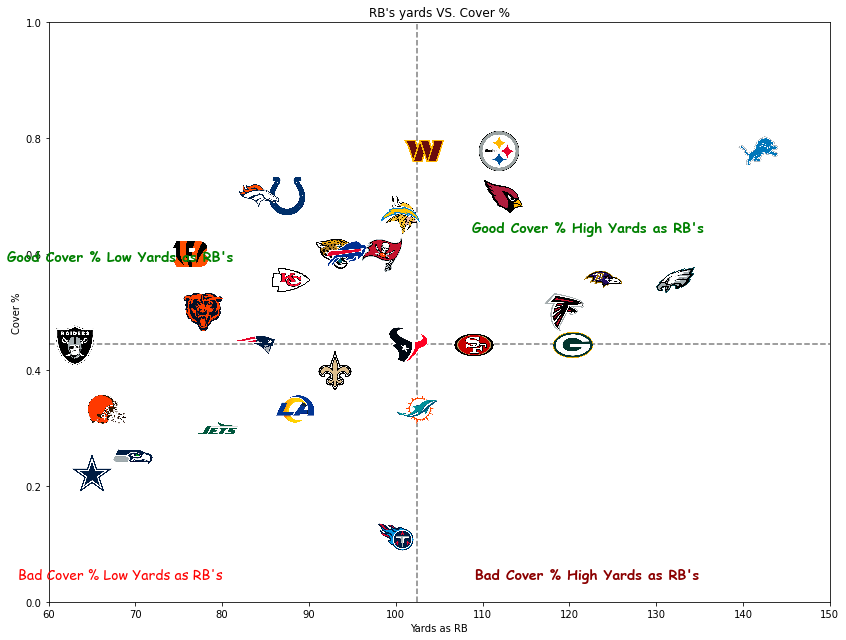

In [79]:
# create graph for Cover % and team rb yards per game

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image, ImageOps  # Make sure to import ImageOps here
import numpy as np
import random

plt.rcParams["figure.figsize"] = [12, 9]
plt.rcParams["figure.autolayout"] = True

# Function to load, resize, and pad images to a consistent size
def getImage(path):
    img = Image.open(path)
    
    # Resize image while maintaining aspect ratio
    img = ImageOps.fit(img, (550, 550), method=0, bleed=0.0, centering=(0.5, 0.5))
    
    return OffsetImage(np.array(img), zoom=0.08)

y = run_df['Cover %']
x = run_df['rushing_yards']
paths = run_df['logo_path_cover']

fig, ax = plt.subplots()

# Define quadrant boundaries
x_mid = (x.max() + x.min()) / 2
y_mid = (y.max() + y.min()) / 2

# Quadrant 1 (Top-Right)
for x0, y0, path in zip(x, y, paths):
    if x0 >= x_mid and y0 >= y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

# Quadrant 2 (Top-Left)
for x0, y0, path in zip(x, y, paths):
    if x0 < x_mid and y0 >= y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

# Quadrant 3 (Bottom-Left)
for x0, y0, path in zip(x, y, paths):
    if x0 < x_mid and y0 < y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

# Quadrant 4 (Bottom-Right)
for x0, y0, path in zip(x, y, paths):
    if x0 >= x_mid and y0 < y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

     
 # Adding quadrant text with specified colors
texts= [
    ("Good Cover % Low Yards as RB's", (x_mid / 1.5, y_mid + 0.15), 'green', 'bold'),  # Top Left
    ("Good Cover % High Yards as RB's", (x_mid + (x.max() - x_mid) / 2, y_mid + 0.2), 'green', 'bold'),  # Top Right
    ("Bad Cover % Low Yards as RB's", (x_mid / 1.5, y_mid - 0.4), 'red', 'normal'),  # Bottom Left
    ("Bad Cover % High Yards as RB's", (x_mid + (x.max() - x_mid) / 2, y_mid - 0.4), '#8B0000', 'bold')  # Bottom Right (dark red)
]

for text, (x_pos, y_pos), color, weight in texts:
    ax.text(x_pos, y_pos, text, fontsize=14, fontweight=weight, fontname='Comic Sans MS', color=color, ha='center', va='center')

plt.axvline(x_mid, color='black', linestyle='--', alpha=0.5)
plt.axhline(y_mid, color='black', linestyle='--', alpha=0.5)
plt.title("RB's yards VS. Cover %")
plt.ylabel("Cover %")
plt.xlabel("Yards as RB")
plt.grid(False)
plt.xlim(60, 150)
plt.ylim(0, 1)
#plt.savefig('Cover%_RushYardsGivenUp.png')

plt.show()